In [3]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

from scipy import ndimage, stats

import os
import pandas as pd

In [129]:
box_params = {'widths':0.75, 'patch_artist':True, 'medianprops':{'lw':3, 'color':'silver'}}
colors = ['red', 'cornflowerblue']

imtype = ['Diseased', 'Healthy', 'Binary']
genotypes = ['CAL','MLB','222','299','517','521']
runnum = 1
geodesic = 'crown'

src = '../run{:02d}/'.format(runnum)
dst = src + 'diagnostic/'

hsrc = src + 'histograms/'

gidx = 3

dfilenames = sorted(glob(hsrc + '*{}*_-_*_{}_{}_geodesic.csv'.format(genotypes[gidx], imtype[0].lower(), geodesic) ) )
hfilenames = sorted(glob(hsrc + '*{}*_-_*_{}_{}_geodesic.csv'.format(genotypes[gidx], imtype[1].lower(), geodesic) ) )
print(len(hfilenames))
hfilenames

8


['../run01/histograms/299F_side1_022817046_-_6157_healthy_crown_geodesic.csv',
 '../run01/histograms/299F_side1_030117064_-_5407_healthy_crown_geodesic.csv',
 '../run01/histograms/299F_side2_022817047_-_6343_healthy_crown_geodesic.csv',
 '../run01/histograms/299F_side2_030117065_-_5412_healthy_crown_geodesic.csv',
 '../run01/histograms/299M_side1_022817070_-_4538_healthy_crown_geodesic.csv',
 '../run01/histograms/299M_side1_030117062_-_3815_healthy_crown_geodesic.csv',
 '../run01/histograms/299M_side2_022817071_-_4432_healthy_crown_geodesic.csv',
 '../run01/histograms/299M_side2_030117063_-_3705_healthy_crown_geodesic.csv']

In [130]:
hhist = [None for _ in range(len(hfilenames))]
dhist = [None for _ in range(len(dfilenames))]

for i in range(len(hhist)):
    hhist[i] = np.loadtxt(hfilenames[i], delimiter=',', dtype=int)
    dhist[i] = np.loadtxt(dfilenames[i], delimiter=',', dtype=int)

bname = ['' for _ in range(len(hfilenames)) ]
boxes = [None for _ in range(len(hfilenames)) ]

for i in range(len(hhist)):
    bname[i], vmax = os.path.splitext(os.path.split(hfilenames[i])[1])[0].split('_-_')
    vmax = int(vmax.split('_')[0])
    vmin = vmax - len(hhist[i])
    boxes[i] = [ np.repeat(np.arange(vmin+1,vmax+1)/vmax, hist) for hist in [hhist[i], dhist[i]] ]

../run01/diagnostic/crown_geodesic_histogram_-_run01_299


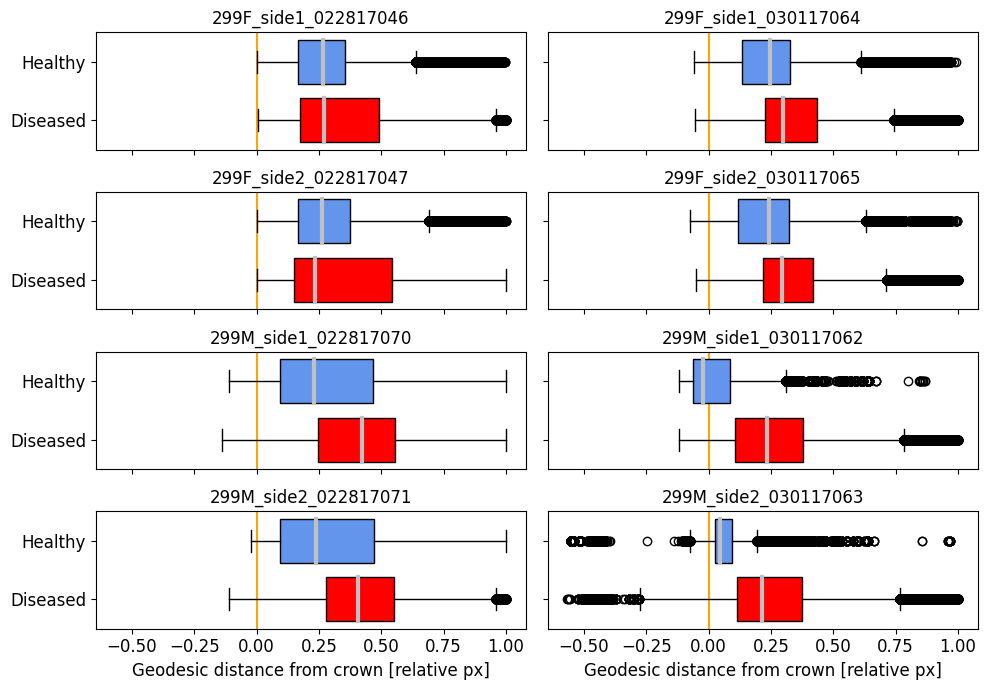

In [131]:
fs = 12
rnum = int(np.ceil(len(hfilenames)/2))
fig, ax = plt.subplots(rnum, 2, figsize=(10, 1+1.5*rnum), sharex=True, sharey=True)
ax = np.atleast_1d(ax).ravel(); i = 0

for i in range(len(hfilenames)):
    ax[i].axvline(0, c='orange', zorder=1)
    bplot = ax[i].boxplot(boxes[i], vert=False, **box_params, zorder=2)
    for patch, c in zip(bplot['boxes'], colors):
        patch.set_facecolor(c)
    
    ax[i].set_title('{}'.format(bname[i]), fontsize=fs)
    ax[i].set_yticks(range(1,3), imtype[:2])
    ax[i].tick_params(labelsize=fs);
    
for i in range(len(hfilenames) - 2, len(hfilenames)):
    ax[i].set_xlabel('Geodesic distance from {} [relative px]'.format(geodesic), fontsize=fs)

for i in range(len(ax)-len(hfilenames)):
    fig.delaxes(ax[-(i+1)])
fig.tight_layout();

filename = dst + geodesic + '_geodesic_histogram_-_' + 'run{:02d}_{}'.format(runnum, genotypes[gidx])
print(filename)
plt.savefig(filename +'.png', format='png', bbox_inches='tight', dpi=200)

In [66]:
filename = ddst + 'dict_watershed_root_tip_-_' + bname
filename

NameError: name 'ddst' is not defined

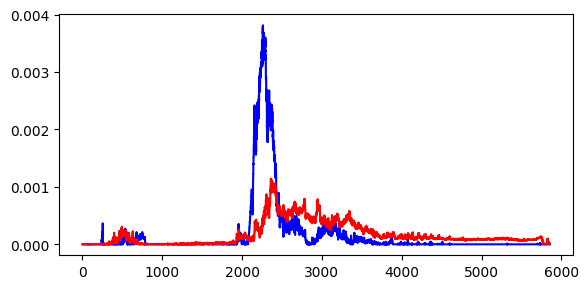

In [59]:
fig, ax = plt.subplots(1,1, figsize=(6,3), sharex=True, sharey=True)
ax = np.atleast_1d(ax).ravel(); i = 0

ax[i].plot(range(1,len(hhist)+1), hhist/np.sum(hhist), c='blue', ds='steps')
ax[i].plot(range(1,len(dhist)+1), dhist/np.sum(dhist), c='red', ds='steps')

fig.tight_layout()